<a href="https://colab.research.google.com/github/Rdcornejov/Metodologia-para-Data-Science/blob/main/EP_Cornejo_Ronaldo_u201816502.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Integrante: Ronaldo Cornejo Valencia

## 1. Comprensión del Negocio

El problema a resolver en este proyecto tiene relevancia médica y de salud pública, ya que el consumo excesivo de alcohol puede causar daños significativos al hígado, una condición que puede llevar a enfermedades hepáticas graves como la cirrosis. El objetivo principal de este estudio es crear un modelo predictivo que, basado en los resultados de pruebas sanguíneas y el consumo diario de alcohol, pueda identificar si un individuo tiene un hígado enfermo o sano. Esta información puede ser de gran valor para los profesionales de la salud al identificar de manera temprana a individuos en riesgo de sufrir enfermedades hepáticas debido al consumo de alcohol.

Objetivos específicos:
- Prevención temprana: El modelo tiene el potencial de ayudar a los médicos a detectar problemas en el hígado antes de que la enfermedad progrese a estadios irreversibles.
- Optimización de recursos médicos: Al identificar a los pacientes que están en mayor riesgo, los recursos clínicos pueden ser enfocados en quienes más lo necesiten.
- Mejora en el monitoreo de pacientes: Se puede usar este modelo predictivo para dar seguimiento a pacientes con hábitos de consumo de alcohol, orientando intervenciones más tempranas.

## 2. Comprensión de los datos

Descripción de las variables:

* V1: Volumen corpuscular (en fl).

* V2: Fosfatasa alcalina (en U/L).

* V3: Alamine aminotransferase (en U/L).

* V4: Aspartate aminotransferase (en U/L).

* V5: Gamma-glutamil transpeptidasa (en U/L).

* V6: Número de equivalentes de medio litro de bebidas alcohólicas consumidas por día.

* V8: Estado del hígado (1 = hígado enfermo, 2 = hígado sano).

In [63]:
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression

In [33]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
data = pd.read_csv('bupa-data-ep.csv')
data.head()

,V1,V2,V3,V4,V5,V6,V8
0,85,92.0,45.0,27,31,0.0,1
1,85,64.0,59.0,32,23,0.0,2
2,86,54.0,33.0,16,54,0.0,2
3,91,78.0,34.0,24,36,0.0,2
4,87,70.0,12.0,28,10,0.0,2


In [7]:
data_x = data.drop('V8', axis=1)
data_y = data['V8']

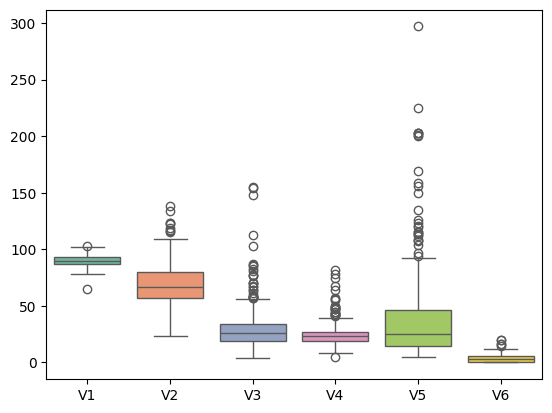

In [8]:
sns.boxplot(data=data_x, orient="v", palette="Set2")
plt.show()

Visualizamos que existe valores atipicos

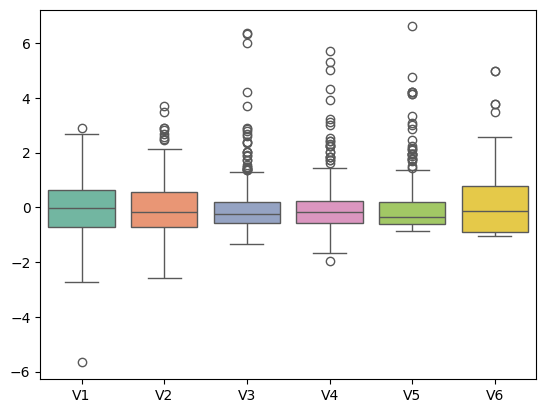

In [9]:
data_X_1 = pd.DataFrame(StandardScaler().fit_transform(data_x))
data_X_1.columns = ["V1","V2","V3","V4","V5","V6"]
data_X_1.head()

sns.boxplot(data=data_X_1, orient="v", palette="Set2")
plt.show()

In [10]:
data.dtypes

,0
V1,int64
V2,float64
V3,float64
V4,int64
V5,int64
V6,float64
V8,int64


Visualizamos que hay datos faltantes en la nariable V2 y V3

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 345 entries, 0 to 344
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      345 non-null    int64  
 1   V2      341 non-null    float64
 2   V3      339 non-null    float64
 3   V4      345 non-null    int64  
 4   V5      345 non-null    int64  
 5   V6      345 non-null    float64
 6   V8      345 non-null    int64  
dtypes: float64(3), int64(4)
memory usage: 19.0 KB


In [12]:
data.isnull().sum()

,0
V1,0
V2,4
V3,6
V4,0
V5,0
V6,0
V8,0


Vemos que está un poco desbalanceado en los valores de V8

Estado del hígado (1 = hígado enfermo, 2 = hígado sano)
 V8
2    200
1    145
Name: count, dtype: int64


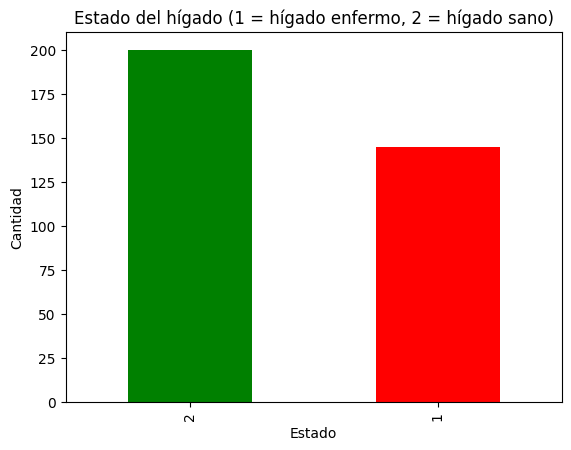

In [15]:
 # Análisis de la distribución de sentimientos
contador_estados = data['V8'].value_counts()
print("Estado del hígado (1 = hígado enfermo, 2 = hígado sano)\n", contador_estados)
contador_estados.plot(kind='bar', color=['green', 'red'])
plt.title('Estado del hígado (1 = hígado enfermo, 2 = hígado sano)')
plt.xlabel('Estado')
plt.ylabel('Cantidad')
plt.show()

## 3. Preparación de los datos

Imputación de los valores faltantes

In [17]:
data['V2'].fillna(data['V2'].median(), inplace=True)
data['V3'].fillna(data['V3'].median(), inplace=True)

In [18]:
data.isnull().sum()

,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V8,0


Tratamiento de valores atipicos

Revisamos si son distribuciones normales con la prueba de shapiro

In [20]:
for col in data_x.columns:
    print(col, "-->", stats.shapiro(data[col]), "Se aproxima a distribucion normal" if stats.shapiro(data[col])[1] > 0.05 else "No se aproxima a distribucion normal", "\n")

V1 --> ShapiroResult(statistic=0.9721210720214322, pvalue=3.3408291692175986e-06) No se aproxima a distribucion normal 

V2 --> ShapiroResult(statistic=0.965011562178862, pvalue=2.3235119135107318e-07) No se aproxima a distribucion normal 

V3 --> ShapiroResult(statistic=0.7217503028194162, pvalue=1.3926517403948677e-23) No se aproxima a distribucion normal 

V4 --> ShapiroResult(statistic=0.8149622094153431, pvalue=1.4028839075597481e-19) No se aproxima a distribucion normal 

V5 --> ShapiroResult(statistic=0.6839380588671681, pvalue=6.48073466081761e-25) No se aproxima a distribucion normal 

V6 --> ShapiroResult(statistic=0.8354936513596574, pvalue=1.6864816314857383e-18) No se aproxima a distribucion normal 



Como ninguna se aproxima a una distribución normal, aplicaremos el método de rango Intercuartil.

Calculamos los límites tanto inferiores como superiores

In [21]:
df_numeric = data.drop('V8', axis=1)

Q1 = df_numeric.quantile(0.25)
Q3 = df_numeric.quantile(0.75)
IQR = Q3 - Q1

lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

pd.DataFrame([lower_limit, upper_limit], index = ["Límite inferior", "Límite superior"]).T

,Límite inferior,Límite superior
V1,78.00,102.00
V2,22.50,114.50
V3,-1.00,55.00
V4,7.00,39.00
V5,-31.50,92.50
V6,-7.75,14.25


Mostramos la cantidad de valores atipicos y el porcentaje de impacto. Dado que ninguno supera el 15% y por la poca cantidad de datos que tenemos en el dataset, reemplazaremos por los limites en vez de eliminar los datos

In [22]:
outliers = (df_numeric < (Q1 - 1.5 * IQR)) | (df_numeric > (Q3 + 1.5 * IQR))
outliers.sum()

,0
V1,2
V2,9
V3,29
V4,24
V5,27
V6,5


In [23]:
(outliers.sum() / df_numeric.shape[0]) * 100

,0
V1,0.579710
V2,2.608696
V3,8.405797
V4,6.956522
V5,7.826087
V6,1.449275


In [30]:
x_limpio = data.copy()

for col in df_numeric.columns:
  x_limpio[col] = np.where(
      x_limpio[col] > upper_limit[col],
      upper_limit[col],
      np.where(
          x_limpio[col] < lower_limit[col],
          lower_limit[col],
          x_limpio[col]
      )
  )

Ya no hay valores atipicos, porque reemplazamos por los limites

In [31]:
for col in df_numeric.columns:
    print(col, " -> Cantidad atípicos: ", len(x_limpio[(x_limpio[col] > upper_limit[col]) | (x_limpio[col] < lower_limit[col])]))

V1  -> Cantidad atípicos:  0
V2  -> Cantidad atípicos:  0
V3  -> Cantidad atípicos:  0
V4  -> Cantidad atípicos:  0
V5  -> Cantidad atípicos:  0
V6  -> Cantidad atípicos:  0


Visualizamos el antes y despues de las variables con mas valores atipicos, vemos como se quitaron los atipicos y como se parecen un poco más a una distribución normal

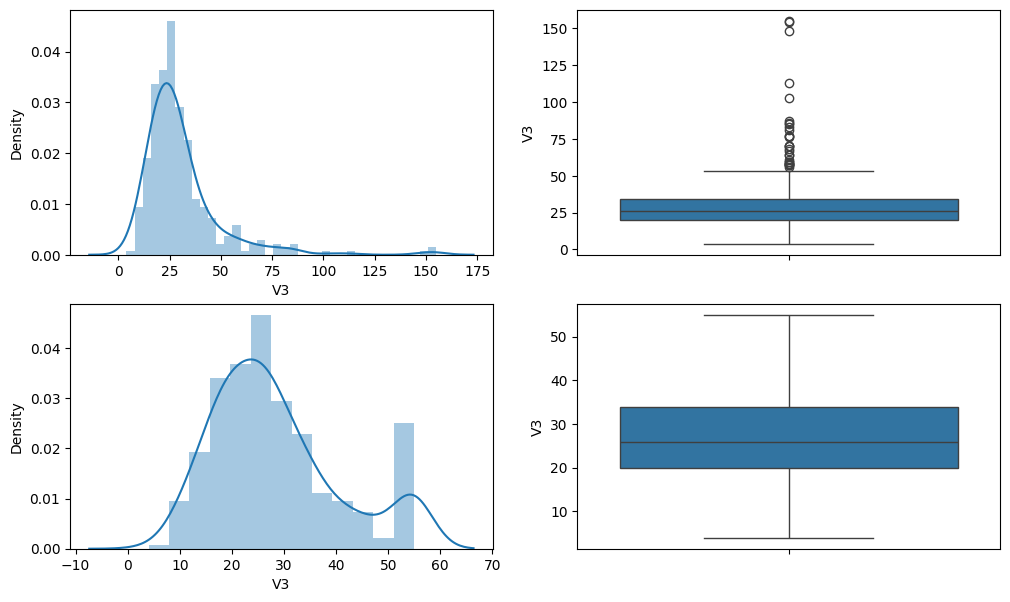

In [37]:
plt.figure(figsize=(12,7))
plt.subplot(2,2,1)
sns.distplot(data['V3'])
plt.subplot(2,2,2)
sns.boxplot(data['V3'])
plt.subplot(2,2,3)
sns.distplot(x_limpio['V3'])
plt.subplot(2,2,4)
sns.boxplot(x_limpio['V3'])
plt.show()

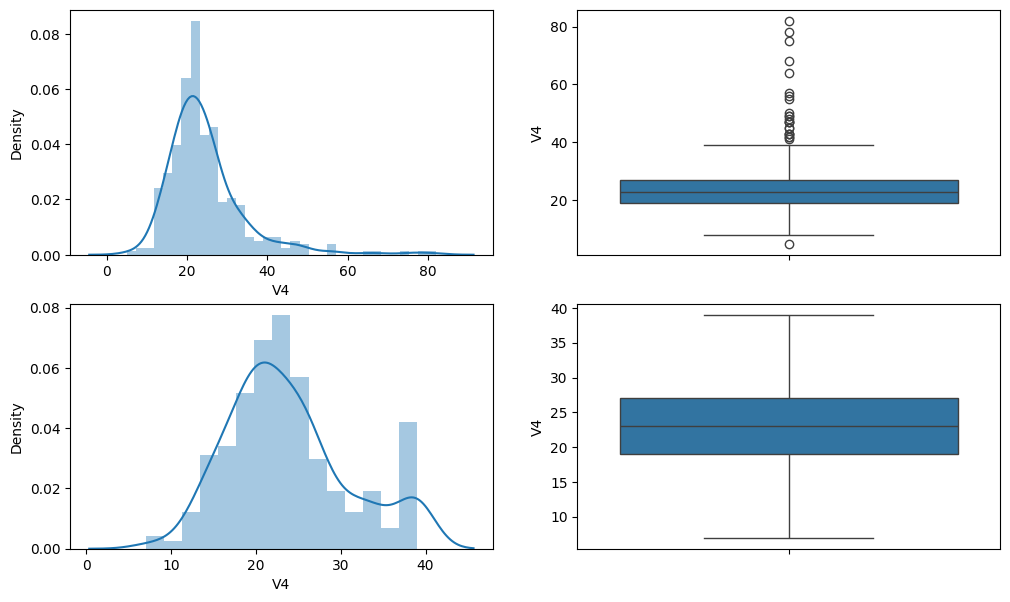

In [38]:
plt.figure(figsize=(12,7))
plt.subplot(2,2,1)
sns.distplot(data['V4'])
plt.subplot(2,2,2)
sns.boxplot(data['V4'])
plt.subplot(2,2,3)
sns.distplot(x_limpio['V4'])
plt.subplot(2,2,4)
sns.boxplot(x_limpio['V4'])
plt.show()

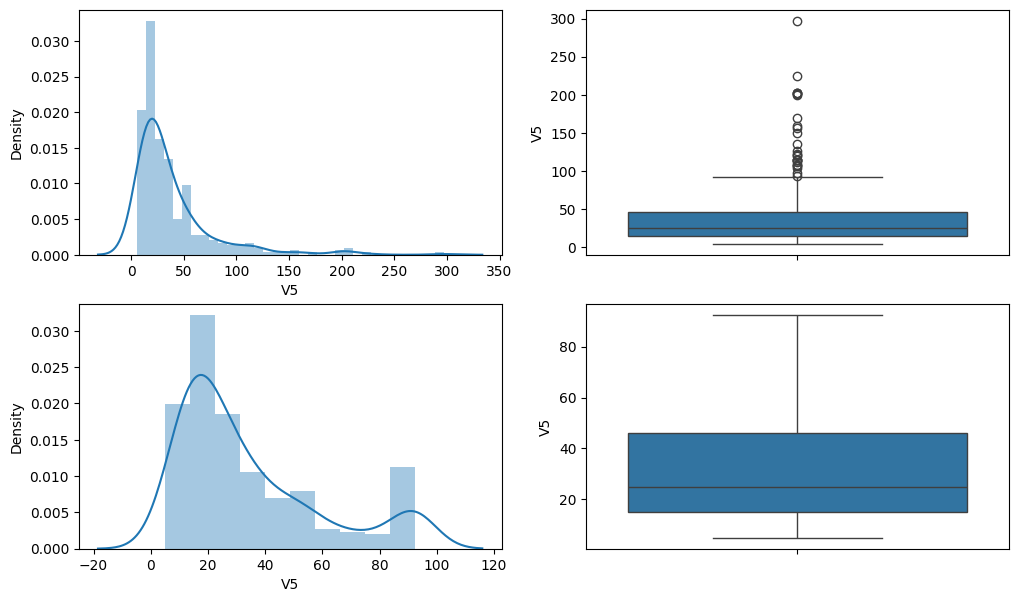

In [36]:
plt.figure(figsize=(12,7))
plt.subplot(2,2,1)
sns.distplot(data['V5'])
plt.subplot(2,2,2)
sns.boxplot(data['V5'])
plt.subplot(2,2,3)
sns.distplot(x_limpio['V5'])
plt.subplot(2,2,4)
sns.boxplot(x_limpio['V5'])
plt.show()

## 4. Modelado

Normalizamos los datos antes de uzar los modelos

In [47]:
x_limpio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 345 entries, 0 to 344
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      345 non-null    float64
 1   V2      345 non-null    float64
 2   V3      345 non-null    float64
 3   V4      345 non-null    float64
 4   V5      345 non-null    float64
 5   V6      345 non-null    float64
 6   V8      345 non-null    int64  
dtypes: float64(6), int64(1)
memory usage: 19.0 KB


In [48]:
x = x_limpio.drop('V8', axis=1)
y = x_limpio['V8']

In [49]:
x_normalizado = pd.DataFrame(StandardScaler().fit_transform(x))
x_normalizado.columns = ["V1","V2","V3","V4","V5","V6"]
x_normalizado.head()

,V1,V2,V3,V4,V5,V6
0,-1.215896,1.265001,1.370977,0.458801,-0.119068,-1.083033
1,-1.215896,-0.330600,2.191422,1.159183,-0.437659,-1.083033
2,-0.981809,-0.900457,0.386442,-1.082040,0.796883,-1.083033
3,0.188627,0.467201,0.468486,0.038572,0.080052,-1.083033
4,-0.747722,0.011315,-1.336494,0.598877,-0.955371,-1.083033


In [50]:
x_train, x_test, y_train, y_test = train_test_split(x_normalizado, y, test_size=0.2, random_state=42)

In [51]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(276, 6) (69, 6) (276,) (69,)


Haremos uso de 4 modelos

#### 1. Arboles de decisión

In [52]:
tree_model = DecisionTreeClassifier(random_state=42)

# Entrenar el modelo
tree_model.fit(x_train, y_train)

DecisionTreeClassifier(random_state=42)

In [53]:
y_pred_tree = tree_model.predict(x_test)

In [54]:
accuracy_tree = accuracy_score(y_test, y_pred_tree)
conf_matrix_tree = confusion_matrix(y_test, y_pred_tree)
report_tree = classification_report(y_test, y_pred_tree)

print(f'Precisión del modelo: {accuracy_tree:.2f}')
print('Matriz de Confusión:')
print(conf_matrix_tree)
print('Reporte de Clasificación:')
print(report_tree)

Precisión del modelo: 0.67
Matriz de Confusión:
[[18  9]
 [14 28]]
Reporte de Clasificación:
              precision    recall  f1-score   support

           1       0.56      0.67      0.61        27
           2       0.76      0.67      0.71        42

    accuracy                           0.67        69
   macro avg       0.66      0.67      0.66        69
weighted avg       0.68      0.67      0.67        69



#### 2. SVM

Visualizamos que con 2 componentes, no podemos llegar a una conclusión de que kernel usar, pero lineal es el menos probable

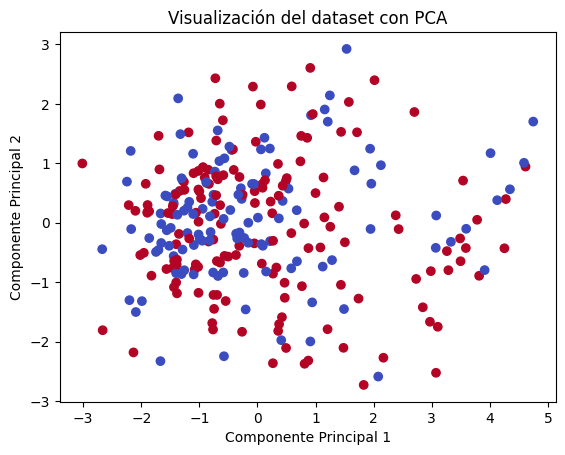

In [59]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(x_train)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_train, cmap='coolwarm') # Change 'y' to 'y_train'
plt.title('Visualización del dataset con PCA')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.show()

In [62]:
# Definir los kernels que queremos probar
kernels = ['linear', 'poly', 'rbf']

# Almacenar los resultados en un diccionario
results = {}

# Iterar sobre los diferentes kernels
for kernel in kernels:
    # Crear un modelo SVM con el kernel actual
    svm_model = SVC(kernel=kernel)

    # Entrenar el modelo con los datos de entrenamiento
    svm_model.fit(x_train, y_train)

    # Hacer predicciones en los datos de prueba
    y_pred = svm_model.predict(x_test)

    # Calcular las métricas de evaluación
    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    report = classification_report(y_test, y_pred)

    # Guardar los resultados en un diccionario
    results[kernel] = {
        'accuracy': accuracy,
        'conf_matrix': conf_matrix,
        'report': report
    }

# Mostrar los resultados para cada kernel
for kernel, metrics in results.items():
    print(f"\nKernel: {kernel}")
    print(f"Precisión del modelo: {metrics['accuracy']:.2f}")
    print("Matriz de Confusión:")
    print(metrics['conf_matrix'])
    print("Reporte de Clasificación:")
    print(metrics['report'])


Kernel: linear
Precisión del modelo: 0.74
Matriz de Confusión:
[[17 10]
 [ 8 34]]
Reporte de Clasificación:
              precision    recall  f1-score   support

           1       0.68      0.63      0.65        27
           2       0.77      0.81      0.79        42

    accuracy                           0.74        69
   macro avg       0.73      0.72      0.72        69
weighted avg       0.74      0.74      0.74        69


Kernel: poly
Precisión del modelo: 0.65
Matriz de Confusión:
[[ 7 20]
 [ 4 38]]
Reporte de Clasificación:
              precision    recall  f1-score   support

           1       0.64      0.26      0.37        27
           2       0.66      0.90      0.76        42

    accuracy                           0.65        69
   macro avg       0.65      0.58      0.56        69
weighted avg       0.65      0.65      0.61        69


Kernel: rbf
Precisión del modelo: 0.75
Matriz de Confusión:
[[19  8]
 [ 9 33]]
Reporte de Clasificación:
              precision 

#### 3. Regresión Logistica

In [64]:
model = LogisticRegression(multi_class='multinomial', solver='lbfgs')
model.fit(x_train, y_train)

LogisticRegression(multi_class='multinomial')

In [66]:
y_pred_RL = model.predict(x_test)

In [72]:
accuracy_RL = accuracy_score(y_test, y_pred_RL)
conf_matrix_RL = confusion_matrix(y_test, y_pred_RL)
report_RL = classification_report(y_test, y_pred_RL)

print(f'Precisión del modelo: {accuracy_RL:.2f}')
print('Matriz de Confusión:')
print(conf_matrix_RL)
print('Reporte de Clasificación:')
print(report_RL)

Precisión del modelo: 0.72
Matriz de Confusión:
[[17 10]
 [ 9 33]]
Reporte de Clasificación:
              precision    recall  f1-score   support

           1       0.65      0.63      0.64        27
           2       0.77      0.79      0.78        42

    accuracy                           0.72        69
   macro avg       0.71      0.71      0.71        69
weighted avg       0.72      0.72      0.72        69



#### 4. Random Forest

In [68]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [69]:
y_pred_rf = rf_model.predict(x_test)

In [71]:
accuracy_rf = accuracy_score(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
report_rf = classification_report(y_test, y_pred_rf)

print(f'Precisión del modelo: {accuracy_rf:.2f}')
print('Matriz de Confusión:')
print(conf_matrix_rf)
print('Reporte de Clasificación:')
print(report_rf)

Precisión del modelo: 0.75
Matriz de Confusión:
[[18  9]
 [ 8 34]]
Reporte de Clasificación:
              precision    recall  f1-score   support

           1       0.69      0.67      0.68        27
           2       0.79      0.81      0.80        42

    accuracy                           0.75        69
   macro avg       0.74      0.74      0.74        69
weighted avg       0.75      0.75      0.75        69



## 5. Evaluación

Los modelos con mejor precisión fueron el Random Forest y el SVM con el kernel "rft". Si se tuviera que elegir entre todos los modelos, se elegiria uno de estos 2, ya que tienen una precisión del 0.75.

Ahora para elegir el mejor de todos, depende que debemos priorizar, en nuestro caso se priorizará la metrica recall para la deteccioón correcta de pacientes enfermos (Clase 1), con Random Forest obtenemos un 0.67 y con SVM con kernel "rft", tenemos un 0.70. Así que si se debe elegir un modelo, este sería SVM con el kernel "rft".